In [103]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow import keras
# from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
import glob
from PIL import Image
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve, roc_curve


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
import joblib
# from sklearn.externals import joblib

In [104]:
filepath = "KaggleImbalanced.csv"
df = pd.read_csv(filepath)
# partial_data = df[:100000]
# df = partial_data

feats_importance = ['Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward',
 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total',
 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max',
 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
 'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance', 'Bwd.Packets.s',
 'Flow.IAT.Mean', 'Fwd.Header.Length', 'act_data_pkt_fwd', 'Max.Packet.Length',
 'Flow.Packets.s', 'Flow.IAT.Std', 'Packet.Length.Std', 'Idle.Max',
 'Fwd.Header.Length.1', 'Bwd.Packet.Length.Mean', 'Bwd.IAT.Std', 'Fwd.Packet.Length.Min',
 'Bwd.Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size', 'Total.Length.of.Bwd.Packets',
 'Packet.Length.Mean', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Flow.IAT.Min',
 'Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets',
 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets', 
 'Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min']

In [105]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats].astype(float)
Y = df['ProtocolName']

In [106]:
# Convert application names to numbers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [107]:
dummy_y = np_utils.to_categorical(encoded_Y)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.3, random_state = 42)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [9]:
max_features = X_train.shape[1:]
num_classes = y_train.shape[1]
print(max_features)
print(num_classes)

(78,)
53


In [12]:
# pipeline.predict(X_test)

In [14]:
# joblib.dump(pipeline, 'ANN_model.joblib')

In [15]:
model = Sequential()
model.add(Dense(256, input_shape=max_features, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               20224     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 53)                3445      
Total params: 81,333
Trainable params: 81,333
Non-trainable params: 0
_________________________________________________________________


In [17]:
# %%time
# # history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
# # history = model_clf.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
# history = model_clf.fit(
#                 X_train, y_train,
#                 batch_size=64,
#                 epochs=10,
#                 verbose=2,
#                 validation_data=(X_test, y_test))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',keras.metrics.Precision(), keras.metrics.Recall(), get_f1])

In [19]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
4600/4600 [==============================] - 15s 3ms/step - loss: 0.9204 - acc: 0.6824 - precision: 0.8270 - recall: 0.5610 - get_f1: 0.6456 - val_loss: 0.5265 - val_acc: 0.7985 - val_precision: 0.8651 - val_recall: 0.7482 - val_get_f1: 0.8018
Epoch 2/10
4600/4600 [==============================] - 16s 3ms/step - loss: 0.4604 - acc: 0.8326 - precision: 0.8698 - recall: 0.7946 - get_f1: 0.8300 - val_loss: 0.4570 - val_acc: 0.8034 - val_precision: 0.8389 - val_recall: 0.7835 - val_get_f1: 0.8099
Epoch 3/10
4600/4600 [==============================] - 15s 3ms/step - loss: 0.3701 - acc: 0.8651 - precision: 0.8891 - recall: 0.8420 - get_f1: 0.8646 - val_loss: 0.2888 - val_acc: 0.8910 - val_precision: 0.9138 - val_recall: 0.8719 - val_get_f1: 0.8921
Epoch 4/10
4600/4600 [==============================] - 14s 3ms/step - loss: 0.3241 - acc: 0.8810 - precision: 0.8999 - recall: 0.8633 - get_f1: 0.8810 - val_loss: 0.3079 - val_acc: 0.8830 - val_precision: 0.9003 - val_recall: 0.8729 -

In [20]:
%%time
loss, accuracy, precision, recall, f1 = model.evaluate(X_test, y_test, verbose=2)

3943/3943 - 6s - loss: 0.1322 - acc: 0.9554 - precision: 0.9608 - recall: 0.9514 - get_f1: 0.9560
Wall time: 6.06 s


In [21]:
print("Accuracy:")
print(accuracy)
print("Precsion:")
print(precision)
print("Recall:")
print(recall)
print("F1:")
print(f1)

Accuracy:
0.9554343819618225
Precsion:
0.960788369178772
Recall:
0.9513519406318665
F1:
0.9559776782989502


In [22]:
import time

In [24]:
tic = time.time()
y_predict = model.predict_classes(X_test)
toc = time.time()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
print("Time consumed for prediction on test dataset is",toc-tic,"seconds")

Time consumed for prediction on test dataset is 2.633460521697998 seconds


In [26]:
y_predict

array([ 0, 30, 48, ..., 22, 13,  9], dtype=int64)

In [27]:
tic = time.time()
y_predict = model.predict(X_test)
toc = time.time()

In [29]:
y_predict
print("Time consumed for prediction on test dataset is",toc-tic,"seconds")

Time consumed for prediction on test dataset is 2.6850149631500244 seconds


In [30]:
tic = time.time()
y_predict = np.argmax(model.predict(X_test), axis=-1)
toc = time.time()

In [31]:
y_predict

array([ 0, 30, 48, ..., 22, 13,  9], dtype=int64)

In [32]:
print("Time consumed for prediction on test dataset is",toc-tic,"seconds")

Time consumed for prediction on test dataset is 2.8718008995056152 seconds


In [34]:
print(encoded_Y)
# print(dummy_y)

[ 0  0  0 ... 52 52 52]


In [35]:
print(dummy_y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [37]:
df['ProtocolName'].unique()

array(['AMAZON', 'APPLE', 'APPLE_ICLOUD', 'APPLE_ITUNES', 'CITRIX_ONLINE',
       'CLOUDFLARE', 'CONTENT_FLASH', 'DEEZER', 'DNS', 'DROPBOX',
       'EASYTAXI', 'EBAY', 'EDONKEY', 'FACEBOOK', 'FTP_CONTROL',
       'FTP_DATA', 'GMAIL', 'GOOGLE', 'GOOGLE_MAPS', 'H323', 'HTTP',
       'HTTP_CONNECT', 'HTTP_DOWNLOAD', 'HTTP_PROXY', 'INSTAGRAM',
       'IP_ICMP', 'MICROSOFT', 'MQTT', 'MSN', 'MS_ONE_DRIVE', 'NETFLIX',
       'NTP', 'OFFICE_365', 'SKYPE', 'SPOTIFY', 'SSH', 'SSL',
       'SSL_NO_CERT', 'TEAMVIEWER', 'TELEGRAM', 'TIMMEU', 'TOR', 'TWITCH',
       'TWITTER', 'UBUNTUONE', 'UNENCRYPED_JABBER', 'UPNP', 'WAZE',
       'WHATSAPP', 'WIKIPEDIA', 'WINDOWS_UPDATE', 'YAHOO', 'YOUTUBE'],
      dtype=object)

In [59]:
myDataFrame = df[df['ProtocolName']=='SSL_NO_CERT']
myDataFrame

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
320253,2.021337e+06,9.000000,5.000000,795.000000,625.000000,487.000000,0.0,88.333333,166.426410,482.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT
320254,6.555200e+04,14.000000,8.000000,373.000000,5252.000000,223.000000,0.0,26.642857,69.221614,1436.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT
320255,1.070320e+05,14.000000,12.000000,373.000000,10784.000000,223.000000,0.0,26.642857,69.221614,1436.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT
320256,7.535100e+04,14.000000,11.000000,373.000000,10784.000000,223.000000,0.0,26.642857,69.221614,2660.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT
320257,6.586200e+04,15.000000,13.000000,373.000000,11396.000000,223.000000,0.0,24.866667,67.057403,1436.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330248,2.193829e+05,15.000000,8.880160,373.000000,8951.377933,223.000000,0.0,24.866667,67.057403,2081.874881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT
330249,6.895371e+04,17.000000,12.488750,373.000000,12097.844727,223.000000,0.0,21.941176,63.267755,1999.613769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT
330250,8.335465e+04,10.117512,17.455647,8252.660035,9265.963866,3626.473172,0.0,1149.557745,1192.634198,1296.723223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT
330251,2.440998e+05,14.449681,8.724841,373.000000,9170.904370,223.000000,0.0,25.919328,68.308630,2723.475067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,SSL_NO_CERT


In [99]:
model_output = {}
for label in df['ProtocolName'].unique():
    model_output.setdefault(label, [])
    myDataFrame = df[df['ProtocolName']==label]
    samples = len(myDataFrame)
    myFeats = [x for x in myDataFrame.columns if x != 'ProtocolName']
    X_features = myDataFrame[myFeats].astype(float)
    X_features = scaler.transform(X_features)
    myLabel = myDataFrame['ProtocolName']
    tic = time.time()
    my_predict = np.argmax(model.predict(X_features), axis=-1)
    toc = time.time()
    confidence_score = np.max(model.predict(X_features))
    predicted_class = encoder.inverse_transform(my_predict)
    time_taken = toc-tic
    my_acc = accuracy_score(myDataFrame['ProtocolName'], predicted_class) 
    model_output[label].append(predicted_class)
    model_output[label].append(time_taken)
    model_output[label].append(samples)
    model_output[label].append(my_acc)
    model_output[label].append(confidence_score)
    


In [100]:
# print(model_output['GOOGLE_MAPS'])
print(np.max(model_output['APPLE'][4]))

0.9999628


In [101]:
with  open("Evaluation.txt", 'w+') as f:
    for label in model_output.keys():
        f.write(label +"\t" + str(round(model_output[label][1], 2)) + "\t" + str(model_output[label][2]) + "\t" + str(round(model_output[label][3]*100, 2)) + "\t" + str(round(model_output[label][4]*100, 2)) + "\n")
f.close()

In [ ]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats].astype(float)

In [46]:
classes = encoder.inverse_transform(y_predict)
classes

array(['AMAZON', 'GOOGLE_MAPS', 'APPLE', ..., 'HTTP_DOWNLOAD', 'FACEBOOK',
       'DROPBOX'], dtype=object)

In [47]:
y_test_Data = np.argmax(y_test, axis=-1)
y_test_Data = encoder.inverse_transform(y_test_Data)
y_test_Data

array(['AMAZON', 'NETFLIX', 'WHATSAPP', ..., 'HTTP_DOWNLOAD', 'FACEBOOK',
       'DROPBOX'], dtype=object)

In [48]:
print(classification_report(y_test_Data, classes))
print(confusion_matrix(y_test_Data, classes))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

           AMAZON       0.98      0.91      0.94      2958
            APPLE       0.86      0.98      0.92      2977
     APPLE_ICLOUD       0.93      0.84      0.88      2950
     APPLE_ITUNES       0.98      0.91      0.95      3062
    CITRIX_ONLINE       0.83      0.91      0.87        11
       CLOUDFLARE       0.86      0.85      0.85      3046
    CONTENT_FLASH       1.00      1.00      1.00      2950
           DEEZER       1.00      0.11      0.20        18
              DNS       1.00      1.00      1.00      2990
          DROPBOX       0.90      0.92      0.91      3028
         EASYTAXI       1.00      0.99      0.99      3083
             EBAY       0.90      0.96      0.93      3025
          EDONKEY       1.00      0.74      0.85        27
         FACEBOOK       0.99      0.96      0.98      2932
      FTP_CONTROL       0.00      0.00      0.00         9
         FTP_DATA       0.96      0.99      0.98      3

In [113]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'precision_15', 'recall_15', 'get_f1', 'val_loss', 'val_acc', 'val_precision_15', 'val_recall_15', 'val_get_f1'])


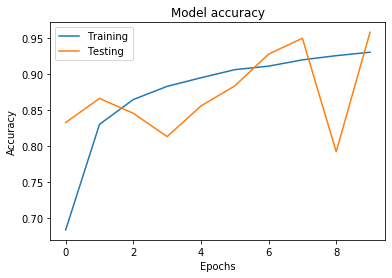

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.savefig("Accuracy_img.png")

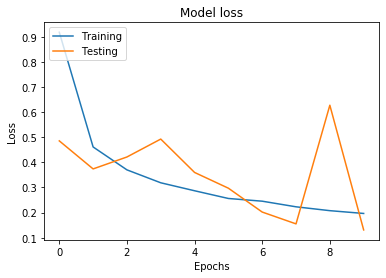

In [34]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend(['Training', 'Testing'], loc='upper left') 
plt.savefig("Loss_img.png")

In [116]:
from keras.models import model_from_json

In [117]:
# serialize model to JSON
model_json = model.to_json()
with open("ANN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("ANN_model.h5")
print("Saved model to disk")

Saved model to disk


In [119]:
model.save("ANN_Model2.h5")

In [120]:
#Use keras.models.load_model(filepath)

In [121]:
def create_model(optimizer='adam',
                 kernel_initializer='glorot_uniform', 
                 dropout=0.2):
    model = Sequential()
    model.add(Dense(64, input_shape=(78,), activation='relu',kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout))
    model.add(Dense(53,activation='sigmoid',kernel_initializer=kernel_initializer))
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

    return model

# wrap the model using the function you created
clf = KerasClassifier(build_fn=create_model,verbose=2)

# just create the pipeline
# pipeline = Pipeline([
#     ('clf',clf)
# ])

# pipeline.fit(X_train, y_train)

In [126]:
%%time
history = clf.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 64)                5056      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 53)                3445      
Total params: 8,501
Trainable params: 8,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4600/4600 - 7s - loss: 2.1452 - accuracy: 0.3868 - val_loss: 1.5102 - val_accuracy: 0.5502
Epoch 2/10
4600/4600 - 8s - loss: 1.4506 - accuracy: 0.5381 - val_loss: 1.1989 - val_accuracy: 0.6260
Epoch 3/10
4600/4600 - 8s - loss: 1.2452 - accuracy: 0.5924 - val_loss: 1.0508 - val_accuracy: 0.6710
Epoch 4/10
4600/4600 - 7s - loss: 1.1248 - accuracy: 0.6266 - val_loss: 0.9

In [40]:
X_test

array([[2.89250007e-05, 0.00000000e+00, 7.43516536e-06, ...,
        0.00000000e+00, 0.00000000e+00, 8.00904977e-01],
       [3.92045889e-01, 8.58251227e-06, 3.71758268e-05, ...,
        3.74992280e-01, 3.74992280e-01, 5.97285068e-01],
       [3.58743342e-03, 3.43300491e-05, 5.20461575e-05, ...,
        0.00000000e+00, 0.00000000e+00, 6.38009050e-01],
       ...,
       [1.96609302e-06, 0.00000000e+00, 1.48703307e-05, ...,
        0.00000000e+00, 0.00000000e+00, 2.66968326e-01],
       [1.35675003e-04, 3.43300491e-05, 4.46109921e-05, ...,
        0.00000000e+00, 0.00000000e+00, 5.33936652e-01],
       [1.06241669e-03, 0.00000000e+00, 7.43516536e-06, ...,
        0.00000000e+00, 0.00000000e+00, 5.42986425e-01]])

In [47]:
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

In [49]:
predict2 = model.predict_classes(X_test)

In [50]:
predict2

array([ 0, 30,  2, ..., 22, 13,  9], dtype=int64)

In [45]:
# confusion_matrix_train1 = confusion_matrix(y_test[:,1], predict)
# confusion_matrix_test1 = confusion_matrix(y_test[:,1], predict)
# print(classification_report(y_test[:,1], predict))

In [44]:
# y_pred = np.argmax(Y_pred, axis=1)
# enc.inverse_transform(encoded)
# enc = LabelEncoder().fit(c)
# >>> encoded = enc.transform(c)
# >>> encoded

# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# encoder.inverse_transform(encoded_Y)
encoder.inverse_transform(predict2)

array(['AMAZON', 'NETFLIX', 'APPLE_ICLOUD', ..., 'HTTP_DOWNLOAD',
       'FACEBOOK', 'DROPBOX'], dtype=object)

In [51]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
encoder.inverse_transform(encoded_Y)

array(['AMAZON', 'AMAZON', 'AMAZON', ..., 'YOUTUBE', 'YOUTUBE', 'YOUTUBE'],
      dtype=object)

In [56]:
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [58]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)